# Assignment 2
*Topics: condition number, polynomial interpolation, plotting with python*

For details on how to upload your notebook back to canvas, check the canvas homepage for a quick tutorial. For additional help with the jupyter workflow and python in general, attend an office hour at 6pm PST on Wednesday.

*All norms in this assignment are with respect to the 2-norm.*

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

**Exercise 1(a)**

Let $A$ and $B$ be matrices with 

$$ A = \begin{pmatrix} 1 & 2 & - 2 \\ 2 & -4 & 7 \\ 5 & -2 & -6 \end{pmatrix}, \quad B = \begin{pmatrix} 1 & 0 & 2 \\ 9 & - 10 & 1 \\ 6 & -7 & 0 \end{pmatrix} .$$

Find the condition number of the two matrices. Assign the variable CONDA the value of cond$(A)$ and CONDB the value of cond$(B)$. The function call np.linalg.cond(A) returns the condition number of a matrix with respect to the 2-norm. Use this function. 

In [2]:
# YOUR CODE HERE
A = np.array([[1, 2, -2], [2, -4, 7], [5, -2, -6]])
B = np.array([[1, 0, 2], [9, -10, 1], [6, -7, 0]])
print(A)
print(B)

CONDA = np.linalg.cond(A)
CONDB = np.linalg.cond(B)

[[ 1  2 -2]
 [ 2 -4  7]
 [ 5 -2 -6]]
[[  1   0   2]
 [  9 -10   1]
 [  6  -7   0]]


In [3]:
assert isinstance(CONDA,float), "Make sure to assign the variable CONDA"
print("Checkpoint 1.1 passed")


Checkpoint 1.1 passed


**Exercise 1(b)**

Recall the error bound for a nonsingular linear system $Ax = b$. A small change in $b$ results in a change in $x$ depending on the condition number. Precisely, if $A(x + \Delta x) = b + \Delta b$ then

$$ \frac{ \| \Delta x \|}{\|x \|} \leq \text{cond}(A)  \frac{ \| \Delta b \|}{\|b \|} .$$


Let $b$ be the vector

$$ b = \begin{pmatrix} 4 \\ -1 \\ 5 \end{pmatrix}.$$

Let $x$ be the solution to $Ax = b$, where matrix $A$ is as in Exercise 1(a). If $b$ is perturbed by an error $\Delta b$ such that $\| \Delta b \| \leq 0.5 $ determine an upper bound on the norm of $\| \Delta x\|$, where $A(x + \Delta x) = b + \Delta b$. Assign your answer to the variable $DELTAX$. Use the function np.linalg.norm(v) or la.norm(v) to find the 2-norm of a vector (or matrix) v. 






In [4]:
# YOUR CODE HERE
b = np.array([[4], [-1], [5]])
x = np.linalg.solve(A, b)

DELTAX = np.linalg.norm(x) * CONDA * 0.5 / np.linalg.norm(b)

In [5]:
assert isinstance(DELTAX,float), "Make sure you assign DELTAX, use the right functions!"
print("Checkpoint 1.4 passed")


Checkpoint 1.4 passed


**Exercise 1(c)**

Do the same as in 1(b), except with matrix B instead of matrix A. 

Let $y$ be the solution to $By = b$ with vector $b$ as in Exercise 1(b). If $b$ is perturbed by an error $\Delta b$ such that $\| \Delta b \| \leq 0.5 $ determine an upper bound on the norm of $\| \Delta y\|$, where $A(y + \Delta y) = b + \Delta b$. Assign your answer to the variable $DELTAY$. Use the function np.linalg.norm(v) or la.norm(v) to find the 2-norm of a vector (or matrix) v. 

Helpful remark: You should find that the error induced by the matrix with the larger condition number gives a much larger size of error. 



In [6]:
# YOUR CODE HERE
y = np.linalg.solve(B, b)

DELTAY = np.linalg.norm(y) * CONDB * 0.5 / np.linalg.norm(b)

In [7]:
print('Hidden tests here')


Hidden tests here


**Exercise 1(d)**

In Exercise 1(b) and 1(c) we obtained a bound on the error  $\| \Delta x\|$. Lets compute the size of an error term for a particular $\Delta b$. Let 

$$ \Delta b = \frac{1}{2\sqrt{3}}\begin{pmatrix} 1 \\ -1 \\ 1 \end{pmatrix}.$$

If $A(x + \Delta x) = b + \Delta b$, where $Ax = b$ and $A,b,\Delta b$ are all defined above, determine $\Delta x$. Record your answer as the variable DX0 where DX0 has the value $\| \Delta x\|$, where the norm is the 2-norm. 




In [8]:
# YOUR CODE HERE
db = 1/(2 * 3 ** 0.5) * np.array([[1], [-1], [1]])

xDx = np.linalg.solve(A, b + db)
DX0 = np.linalg.norm(xDx - x)


In [9]:
assert isinstance(DX0,float), "Check that DX0 is the norm of a vector."
print("Checkpoint 1.6 passed")


Checkpoint 1.6 passed


**Exercise 1(e)**

Repeat Exercise 1(d) with matrix $B$.

If $B(y + \Delta y) = b + \Delta b$, where $By = b$ and $B,b,\Delta b$ are all defined above, determine $\Delta y$. Record your answer as the variable DY0 where DY0 has the value $\| \Delta y\|$, where the norm is the 2-norm. 

Are the norms you computed in 1(d) and 1(e) smaller/larger than you expected, given the approximations of 1(b) and 1(c)?

In [10]:
# YOUR CODE HERE

yDy = np.linalg.solve(B, b + db)
DY0 = np.linalg.norm(yDy - y)

As we expect, DY0 is much larger than DX0, since the condition number of B is much larger. 

In [11]:
assert isinstance(DY0,float), "Check that DY0 is the norm of a vector."
print("Checkpoint 1.8 passed")


Checkpoint 1.8 passed


**Exercise 2(a)**

Let $S$ be the set of points $\{ (1,1),(4,-3),(7,9)\}$. Let $T$ be the set of points $\{(-9,10),(-4,2),(-2,2),(0,-2),(1,-3),(3,6),(8,12)\}$. Let $V$ be the $3 \times 3$ Vandermonde matrix corresponding to the polynomial interpolation of $S$. Similarly, let $W$ be the $7 \times 7$ Vandermonde matrix corresponding to the polynomial interpolation of $T$. Determine the condition number of $V$ and $W$. Record your answer by setting the variable CONDV the condition number of $V$ and variable CONDW the condition number of $W$. 

Hint: You can input all the entries of $V,W$ yourself. OR you can call np.vander. Read the documentation online if you'd like to use this method, it is available at numpy.org. 

In [12]:
# YOUR CODE HERE
V = np.vander([1, 4, 7], increasing = True)
W = np.vander([-9, -4, -2, 0, 1, 3, 8], increasing = True)
CONDV = np.linalg.cond(V)
CONDW = np.linalg.cond(W)

In [13]:
print('Hidden tests here')


Hidden tests here


In [14]:
print('Hidden tests here')


Hidden tests here


**Exercise 2(b)**

Let $S$ be the set of points $\{ (1,1),(4,-3),(7,9)\}$. Let $T$ be the set of points $\{(-9,10),(-4,2),(-2,2),(0,-2),(1,-3),(3,6),(8,12)\}$.

Let $M$ be the lower triangular matrix corresponding to the Newton interpolation method on the set $S$. Similarly, let $N$ be the lower triangular matrix corresponding to the Newton interpolation method on the set $T$. Determine the condition number of $M$ and $N$. Record your answer by setting the variable CONDM the condition number of $M$ and variable CONDN the condition number of $N$. 

As a way of checking your answers, you should find that the condition numbers using the Newton interpolation method are smaller than the Vandermonde method. 


In [15]:
# YOUR CODE HERE
def piCoeff(i, t, ts):
    prod = 1
    for j in range(i):
        prod *= (t - ts[j])
    return prod

def makeNewtonMatrix(Ts):
    M = np.zeros((len(Ts), len(Ts)))
    for i in range(len(Ts)):
        for j in range(i + 1):
            M[i, j] = piCoeff(j, Ts[i], Ts)
    return M

Ts = [1, 4, 7]
M = makeNewtonMatrix(Ts)
print(M)
CONDM = np.linalg.cond(M)

Ts = [-9, -4, -2, 0, 1, 3, 8]
N = makeNewtonMatrix(Ts)
print(N)
CONDN = np.linalg.cond(N)

Ts = list(range(0, 6))
M = makeNewtonMatrix(Ts)
print(M)


[[ 1.  0.  0.]
 [ 1.  3.  0.]
 [ 1.  6. 18.]]
[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00]
 [1.0000e+00 5.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00]
 [1.0000e+00 7.0000e+00 1.4000e+01 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00]
 [1.0000e+00 9.0000e+00 3.6000e+01 7.2000e+01 0.0000e+00 0.0000e+00
  0.0000e+00]
 [1.0000e+00 1.0000e+01 5.0000e+01 1.5000e+02 1.5000e+02 0.0000e+00
  0.0000e+00]
 [1.0000e+00 1.2000e+01 8.4000e+01 4.2000e+02 1.2600e+03 2.5200e+03
  0.0000e+00]
 [1.0000e+00 1.7000e+01 2.0400e+02 2.0400e+03 1.6320e+04 1.1424e+05
  5.7120e+05]]
[[  1.   0.   0.   0.   0.   0.]
 [  1.   1.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   0.]
 [  1.   3.   6.   6.   0.   0.]
 [  1.   4.  12.  24.  24.   0.]
 [  1.   5.  20.  60. 120. 120.]]


In [16]:
print('Hidden tests here')


Hidden tests here


In [17]:
print('Hidden tests here')


Hidden tests here


**Exercise 2(c)** 

Let's learn to plot things! The remainder of this assignment isn't for marks, so no stress.

First lets see how to plot the pointsets $S$ and $T$. 

The commands are shown in the next two cells. The function plt.plot is taking a list of x-values for its first arguument, the corresponding y-values for its second, and the type of points to display as its third. In the next cell 'ro' means red circle. Whereas in the following 'bs' is a blue square. 



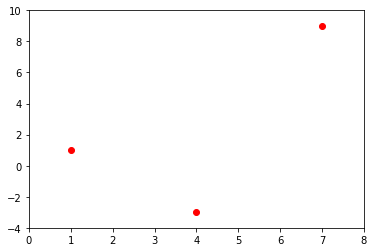

In [18]:
plt.plot([1, 4,7], [1,-3,9], 'ro')
plt.axis([0,8,-4,10])
plt.show()

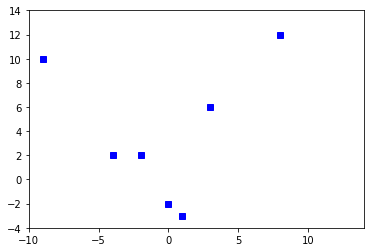

In [19]:
plt.plot([-9,-4,-2,0,1,3,8], [10,2,2,-2,-3,6,12], 'bs')
plt.axis([-10,14,-4,14])
plt.show()

Now we must also plot the graphs of the polynomials. For the set S, the polynomial is degree 2, say it is given by $f(x) = c_0 + c_1 x + c_2x^2$. Then we know 

$$ V \begin{pmatrix} c_0 \\ c_1 \\ c_2 \end{pmatrix} = \begin{pmatrix} 1 \\ -3 \\ 9 \end{pmatrix} .$$

And so we use np.linalg.solve to find the $c_i$. (Done in the following cell)

In [20]:
c = np.linalg.solve(V,np.array([[1],[-3],[9]]))
c

array([[ 5.88888889],
       [-5.77777778],
       [ 0.88888889]])

Now in the following cell we first make our own python function that given a number input representing an x-value, returns the interpolation polynomial's value at the input. Then we make a set of values for which we'll evaluate the function, this is t1. The 0.5,7.5 is the start and end of the range, while 0.1 is the increment. 

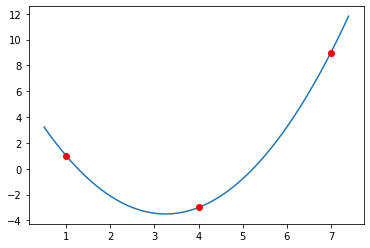

In [21]:
def polyS(t):
    return c[0] + c[1]*t + c[2]* t**2

t1 = np.arange(0.5, 7.5, 0.1)

plt.plot(t1, polyS(t1),[1, 4,7], [1,-3,9], 'ro')
plt.show()



Now lets do this for $T$. For the set $T$, the polynomial is degree 6, say it is given by $f(x) = d_0 + d_1 x +...+ c_6x^6$. Then we know 

$$ W \begin{pmatrix} d_0 \\ d_1 \\ d_2 \\ d_3 \\ d_4 \\ d_5 \\ d_6 \end{pmatrix} = \begin{pmatrix} 10 \\ 2 \\ 2 \\ -2 \\ -3 \\ 6 \\ 12 \end{pmatrix} .$$

And so we use np.linalg.solve to find the $d_i$. (Done in the following cell)

In [22]:
d = np.linalg.solve(W,np.array([[10],[2],[2],[-2],[-3],[6],[12]]))
d

array([[-2.00000000e+00],
       [-1.90686275e+00],
       [ 5.80833333e-01],
       [ 3.14422269e-01],
       [ 1.63270308e-02],
       [-4.36624650e-03],
       [-3.53641457e-04]])

Now we do just about the same thing as before! (except with $T$ now)

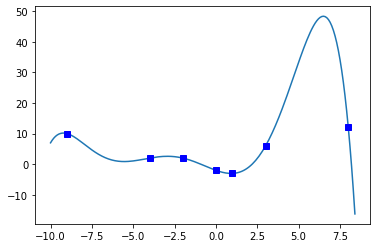

In [23]:
def polyT(t):
    return d[0] + d[1]*t + d[2]* t**2 + d[3]* t**3 + d[4]*t**4 + d[5]*t**5 + d[6]*t**6

t2 = np.arange(-10, 8.5, 0.1)

plt.plot(t2, polyT(t2),[-9,-4,-2,0,1,3,8], [10,2,2,-2,-3,6,12], 'bs')
plt.show()



We can also now see how the Vandermonde interpolation method responds to a little error. Currently our data set is $\{(-9,10),(-4,2),(-2,2),(0,-2),(1,-3),(3,6),(8,12)\}$. Lets modify this by adding a number from $\{-2,-1,0,1,2\}$ to all the $y$-coordinates. We can use python to do this pseudorandomly. The below cell does this, each time you run it, you will get a slightly different altered list of y-coordinates, called Ty_err. 

In [24]:
import random

Ty = [10,2,2,-2,-3,6,12]

Ty_err = []
for i in Ty:
    x = i + random.randint(-2,2)
    Ty_err.append([x])
    
Ty_err



[[11], [4], [1], [-4], [-1], [7], [10]]

Now we can do the same as before and interpolate. 

In [25]:
d_err = np.linalg.solve(W,np.array(Ty_err))
d_err

array([[-4.00000000e+00],
       [ 1.14366947e+00],
       [ 2.08194444e+00],
       [-1.08967087e-01],
       [-1.20236928e-01],
       [ 2.27240896e-03],
       [ 1.31769374e-03]])

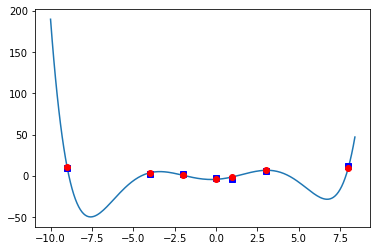

In [26]:
def polyTe(t):
    val = 0
    for i in range(len(d_err)):
        val += d_err[i][0]*t**i
    return val

t2 = np.arange(-10, 8.5, 0.1)

plt.plot(t2, polyTe(t2),[-9,-4,-2,0,1,3,8], [10,2,2,-2,-3,6,12], 'bs',[-9,-4,-2,0,1,3,8],Ty_err,'ro')
plt.show()



The above plot includes the new interpolating polynomial in blue, the old point set $T$ as blue squares, and the new point set as red circles. You will likely see that the point sets are not very different, but the shape of the polynomial has changed considerably. 

As a fun excuse to use more python, we can plot the condition number of Vandermonde matrices as the number of entries increases. Lets plot the condition number of the Vandermonde matricies when the set of x-inputs is $\{1,2,3,...,n\}$.

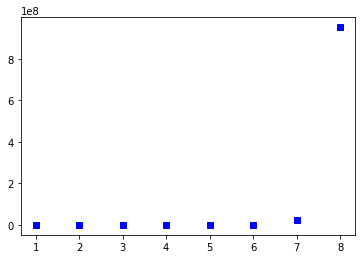

In [27]:
xset = [1,2,3,4,5,6,7,8]
yset = []

for n in xset:
    v = np.array(list(range(1,n+1)))
    Vn = np.vander(v,increasing = True)
    condv = np.linalg.cond(Vn)
    yset.append(condv)
    
plt.plot(xset,yset, 'bs')
plt.show()






As you can see, the condition number jumps up very quickly at the end! You can try re-running the cell above with a different initial xset. For starters, you can just add 9 at the end, i.e. xset = [1,2,3,4,5,6,7,8,9]. 